<a href="https://colab.research.google.com/github/Ankita8619/ML/blob/main/Lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [ ]:
df1 = pd.read_csv("Data1.csv")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(X, y):
    # Add a column of ones to the input matrix X for the intercept term
    X = np.column_stack((np.ones(len(X)), X))

    # Calculate the weight vector using X^T*X and X^T*y
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

def mean_squared_error(X, y, w):
    # Add a column of ones to the input matrix X for the intercept term
    X_with_intercept = np.column_stack((np.ones(len(X)), X))

    # Calculate predicted y values
    y_predicted = X_with_intercept @ w

    # Calculate mean squared error
    mse = np.mean((y - y_predicted)**2)

    return mse

def root_mean_squared_error(X, y, w):
    mse = mean_squared_error(X, y, w)
    rmse = np.sqrt(mse)
    return rmse

# Calculate R-squared
def r_squared(X, y, w):
    # Add a column of ones to the input matrix X for the intercept term
    X_with_intercept = np.column_stack((np.ones(len(X)), X))

    # Calculate predicted y values
    y_predicted = X_with_intercept @ w

    # Calculate R-squared
    r2 = r2_score(y, y_predicted)

    return r2

# Assuming X and y are defined
X = df1[['x']].values
y = df1['y'].values

# Perform linear regression
w_hat = linear_regression(X, y)

# Calculate errors
mse = mean_squared_error(X, y, w_hat)
rmse = root_mean_squared_error(X, y, w_hat)
r2 = r_squared(X, y, w_hat)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print(w_hat)

Mean Squared Error: 2.078525401777326
Root Mean Squared Error: 1.4417091945941547
R-squared: 0.9579571905586358
[5.68078713 2.38406007]


In [ ]:
x_values = np.linspace(min(X), max(X), 100)
x_values_with_intercept = np.column_stack((np.ones(len(x_values)), x_values))

predicted_y_values = x_values_with_intercept @ w_hat

fig = go.Figure()

fig.add_trace(go.Scatter(x=X.flatten(), y=y, mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=x_values.flatten(), y=predicted_y_values, mode='lines', name='Regression Line'))
fig.update_layout(title='Linear Regression', xaxis_title='X', yaxis_title='Y')

fig.show()

In [ ]:
df2=pd.read_csv("Data2.csv")

X = df2[['x']].values
y = np.log(df2['y']).values

# Perform linear regression
w_hat = linear_regression(X, y)

# Print the estimated weights
print("Estimated Weights:", w_hat)

Estimated Weights: [3.68212267 0.97299745]


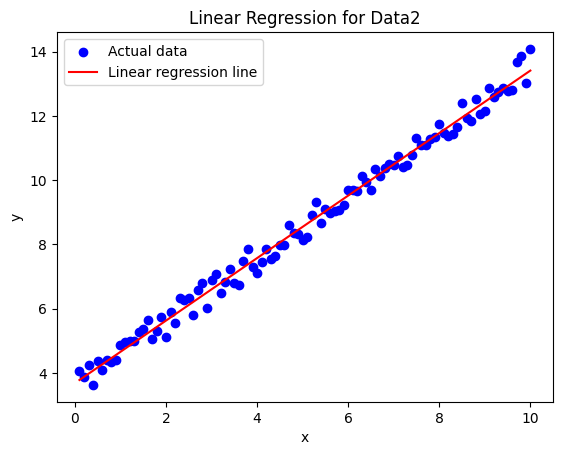

In [ ]:
import matplotlib.pyplot as plt

# Load the dataset
df2 = pd.read_csv("Data2.csv")

# Prepare the data
X = df2[['x']]
y = np.log(df2['y']).values
# Perform linear regression
# Assuming you have the linear regression coefficients stored in 'w_hat'
# Calculate predicted y values
X_with_intercept = np.column_stack((np.ones(len(X)), X))
y_predicted = X_with_intercept @ w_hat

# Plot
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_predicted, color='red', label='Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression for Data2')
plt.legend()
plt.show()


In [ ]:
df3=pd.read_csv("Data3.csv")

X = df3[['x']].values
y = df3['z'].values

# Perform linear regression
w_hat = linear_regression(X, y)

# Print the estimated weights
print("Estimated Weights:", w_hat)

Estimated Weights: [1.17706208 0.09419021]


In [ ]:
x_values = np.linspace(min(X), max(X), 100)
x_values_with_intercept = np.column_stack((np.ones(len(x_values)), x_values))

predicted_y_values = x_values_with_intercept @ w_hat

fig = go.Figure()

fig.add_trace(go.Scatter(x=X.flatten(), y=y, mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=x_values.flatten(), y=predicted_y_values, mode='lines', name='Regression Line'))
fig.update_layout(title='Linear Regression', xaxis_title='X', yaxis_title='Y')

fig.show()

In [ ]:
df4 = pd.read_csv("Data4.csv")

# Extract features (x1, x2, x3) and output variable y
X = df4[['x1', 'x2', 'x3']].values
y = df4['y'].values

# Perform linear regression
w_hat = linear_regression(X, y)

# Add a column of ones to the input matrix X for the intercept term
X_with_intercept = np.column_stack((np.ones(len(X)), X))

# Calculate predicted y values
y_predicted = X_with_intercept @ w_hat

# Calculate errors
mse = mean_squared_error(y, y_predicted)
rmse = root_mean_squared_error(y, y_predicted)
r2 = r_squared(y, y_predicted)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print(w_hat)


Mean Squared Error: 34.620480829243554
Root Mean Squared Error: 5.883917133104744
R-squared: 0.9841749058943147
[13.23947782  6.13243763  2.39226554  7.74681038]


In [ ]:
def gradientDescent(X_test, Y_test):
        """
        Performs gradient descent optimization.

        Args:
            X_test: Feature matrix for test data.
            Y_test: Target vector for test data.
        """
        input_df = X_test.copy()
        input_df.insert(0, "x0", 1)
        x = np.array([input_df[col] for col in input_df.columns])
        xt = x.T
        w = np.zeros((1, len(input_df.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xt
            w = (w - 0.00005 * gradient)

gradientDescent(X,y)